# Virus Chino

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [117]:
mainpath = "C:/Users/Guany/Documents/"
filename = "Covid19casos.csv"
fullpath = os.path.join(mainpath, filename)

In [118]:
VC = pd.read_csv(fullpath)
VC.head()

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,1000000,M,54.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0,2021-03-18
1,1000002,M,22.0,Años,Argentina,Buenos Aires,La Matanza,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Público,Caso Descartado,Descartado,6,2020-06-01,427,2021-03-18
2,1000003,F,41.0,Años,Argentina,Córdoba,Capital,Córdoba,2020-05-24,2020-06-01,...,NaN,NO,14,Privado,Caso Descartado,Descartado,14,2020-06-01,14,2021-03-18
3,1000005,F,58.0,Años,Argentina,Mendoza,Las Heras,Mendoza,NaN,2020-06-01,...,NaN,NO,50,Público,Caso Descartado,Descartado,50,2020-06-01,49,2021-03-18
4,1000006,M,29.0,Años,Argentina,Buenos Aires,Malvinas Argentinas,Buenos Aires,2020-05-30,2020-06-01,...,NaN,NO,6,Público,Caso sospechoso - No Activo - Con muestra sin ...,Sospechoso,6,NaN,515,2021-03-18


In [119]:
VC.describe()

,id_evento_caso,edad,sepi_apertura,carga_provincia_id,residencia_provincia_id,residencia_departamento_id
count,7.491466e+06,7.487468e+06,7.491466e+06,7.491466e+06,7.491466e+06,7.491466e+06
mean,4.929453e+06,3.942873e+01,2.709139e+01,2.331324e+01,2.456044e+01,1.903115e+02
std,2.325955e+06,1.842127e+01,1.841393e+01,2.942521e+01,2.964966e+01,2.478283e+02
min,6.720640e+05,-1.800000e+01,1.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00
25%,2.932655e+06,2.700000e+01,7.000000e+00,2.000000e+00,6.000000e+00,1.400000e+01
50%,4.939036e+06,3.700000e+01,3.300000e+01,6.000000e+00,6.000000e+00,6.300000e+01
75%,6.945625e+06,5.100000e+01,4.400000e+01,3.400000e+01,4.200000e+01,3.710000e+02
max,8.937030e+06,1.944000e+03,5.300000e+01,9.400000e+01,9.900000e+01,8.820000e+02


In [120]:
pd.isnull(VC["edad_años_meses"]).values.ravel().sum()

0

In [121]:
pd.isnull(VC["edad"]).values.ravel().sum()

3998

In [122]:
VC["edad"].mean()

39.42873492080367

In [123]:
VC["edad"].describe()

count    7.487468e+06
mean     3.942873e+01
std      1.842127e+01
min     -1.800000e+01
25%      2.700000e+01
50%      3.700000e+01
75%      5.100000e+01
max      1.944000e+03
Name: edad, dtype: float64

In [124]:
VC.loc[737]

id_evento_caso                              1000994
sexo                                             NR
edad                                              9
edad_años_meses                               Meses
residencia_pais_nombre                    Argentina
residencia_provincia_nombre                    CABA
residencia_departamento_nombre      SIN ESPECIFICAR
carga_provincia_nombre                         CABA
fecha_inicio_sintomas                    2020-06-01
fecha_apertura                           2020-06-01
sepi_apertura                                    23
fecha_internacion                               NaN
cuidado_intensivo                                NO
fecha_cui_intensivo                             NaN
fallecido                                        NO
fecha_fallecimiento                             NaN
asistencia_respiratoria_mecanica                 NO
carga_provincia_id                                2
origen_financiamiento                       Público
clasificacio

In [144]:
VC.loc[VC['edad_años_meses'] == "Meses", ["edad"]] = 0
VC.loc[VC['edad_años_meses'] == "Meses",  ['edad_años_meses']]= "Años"
VC = VC.drop(VC[VC['edad_años_meses'] == 39].index)
VC = VC.drop(VC[VC['sexo'] == 39].index)

In [145]:
VC['sexo'].value_counts()

F     3839595
M     3562341
NR      88872
Name: sexo, dtype: int64

In [146]:
pd.isnull(VC["edad"]).values.ravel().sum()

0

In [147]:
VC["edad"] = VC["edad"].fillna(int(VC["edad"].mean()))

In [148]:
VC[VC['edad'] >= 105] = int(VC["edad"].mean())
VC[VC['edad'] < 0] = int(VC["edad"].mean())

In [149]:
VC['edad'].value_counts()

29.0     188889
30.0     186170
32.0     179454
31.0     178299
28.0     178172
34.0     177411
33.0     175044
26.0     171507
27.0     170815
35.0     168713
39.0     166184
25.0     164603
38.0     161405
36.0     160796
41.0     160239
37.0     158491
24.0     155880
40.0     155435
42.0     152177
43.0     147681
23.0     144388
44.0     138185
22.0     134570
45.0     133191
46.0     127198
21.0     122957
48.0     118652
47.0     118392
49.0     116535
50.0     111753
          ...  
9.0       25765
77.0      25713
0.0       24107
78.0      23702
79.0      22152
80.0      21411
81.0      20159
82.0      18266
83.0      17204
84.0      16312
85.0      15502
86.0      14231
87.0      13275
88.0      12540
89.0      11737
90.0      10660
91.0       8927
92.0       7545
93.0       6505
94.0       5130
95.0       3954
96.0       3147
97.0       2207
98.0       1637
99.0       1101
100.0       712
101.0       364
102.0       205
103.0       131
104.0        55
Name: edad, Length: 105,

In [150]:
VC['edad'].min()

0.0

In [151]:
VC['edad'].max()

104.0

Text(0.5,1,'Histograma de distribucion de pacientes covid por edad')

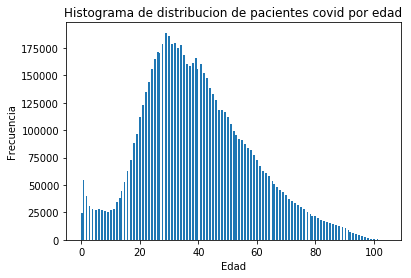

In [164]:
plt.hist(VC["edad"], bins= 200)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Histograma de distribucion de pacientes covid por edad")

In [153]:
VC["edad"].describe()

count    7.490808e+06
mean     3.939567e+01
std      1.839761e+01
min      0.000000e+00
25%      2.700000e+01
50%      3.700000e+01
75%      5.100000e+01
max      1.040000e+02
Name: edad, dtype: float64

Text(0.5,1,'Boxplot de pacientes por edad')

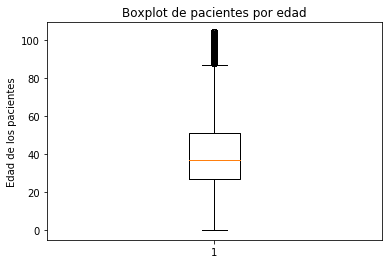

In [154]:
plt.boxplot(VC["edad"])
plt.ylabel("Edad de los pacientes")
plt.title("Boxplot de pacientes por edad")

In [155]:
VC["edad"].mode()

0    29.0
dtype: float64

In [156]:
VC['edad_años_meses'].unique()

array(['Años'], dtype=object)

Text(0.5,1,'Histograma de distribucion de pacientes covid por sexo')

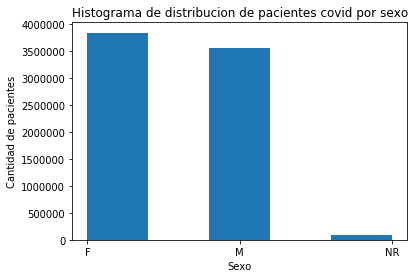

In [167]:
plt.hist(VC["sexo"], bins=5)
plt.xlabel("Sexo")
plt.ylabel("Cantidad de pacientes")
plt.title("Histograma de distribucion de pacientes covid por sexo")

In [160]:
VC["sexo"].value_counts()

F     3839595
M     3562341
NR      88872
Name: sexo, dtype: int64